In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('BBC News Train.csv')

In [3]:
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


# Data Cleaning

In [4]:
data.shape

(1490, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [6]:
data.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [9]:
data.drop(columns=['ArticleId'],inplace=True)


In [11]:
data['CategoryNum'] = data['Category'].factorize()[0]
#[business : 0,tech:1,politics:2 sport: 3,entertainment:4 ] 
data

,Text,Category,CategoryNum
0,worldcom ex-boss launches defence lawyers defe...,business,0
1,german business confidence slides german busin...,business,0
2,bbc poll indicates economic gloom citizens in ...,business,0
3,lifestyle governs mobile choice faster bett...,tech,1
4,enron bosses in $168m payout eighteen former e...,business,0
...,...,...,...
1485,double eviction from big brother model caprice...,entertainment,4
1486,dj double act revamp chart show dj duo jk and ...,entertainment,4
1487,weak dollar hits reuters revenues at media gro...,business,0
1488,apple ipod family expands market apple has exp...,tech,1



# Data Visualization

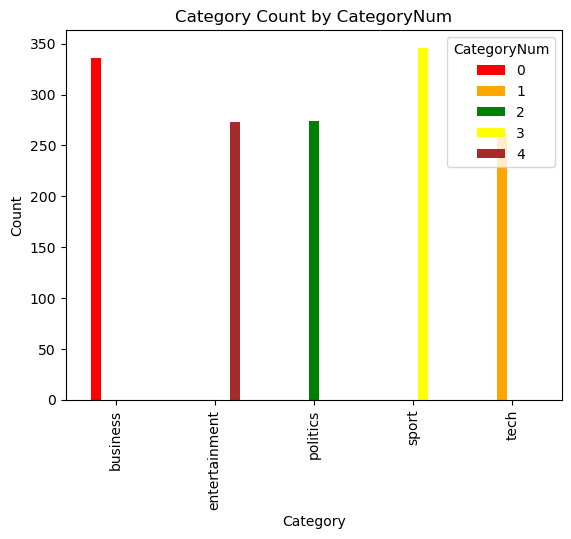

In [12]:

counts = data.groupby(['Category', 'CategoryNum']).size().unstack()

colors = ["red", "orange", "green", "yellow", "brown"]

counts.plot(kind='bar', color=colors)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count by CategoryNum')
plt.legend(title='CategoryNum')

# Show plot
plt.show()


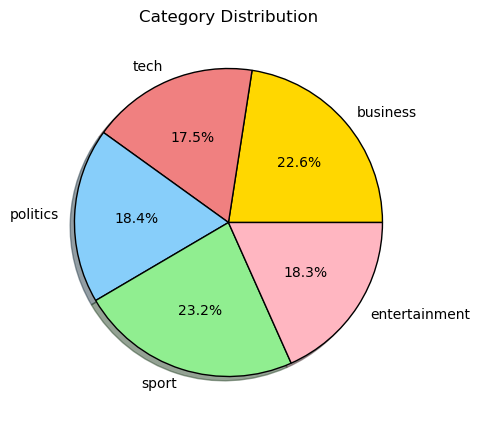

In [13]:


business = data[data['CategoryNum'] == 0]
tech = data[data['CategoryNum'] == 1]
politics = data[data['CategoryNum'] == 2]
sport = data[data['CategoryNum'] == 3]
entertainment = data[data['CategoryNum'] == 4]

count = [
    business['CategoryNum'].count(),
    tech['CategoryNum'].count(),
    politics['CategoryNum'].count(),
    sport['CategoryNum'].count(),
    entertainment['CategoryNum'].count()
]

colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']


# Create figure with specified size
fig = plt.figure(figsize=(5, 5))

# Plot pie chart
pie = plt.pie(count,
              labels=['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct="%1.1f%%",
             shadow=True,
              colors=colors,
  wedgeprops={'edgecolor': 'black'})  

plt.title('Category Distribution')

plt.show()


# Data preprocessing 

In [14]:
def preprocess(text):
    remove = re.compile(r'')
    after_removed_tags= re.sub(remove, '', text) 
    removed_special_char = ''
    for x in after_removed_tags:
        if x.isalnum():
            removed_special_char = removed_special_char + x
        else:
            removed_special_char = removed_special_char + ' '
    lowered_text = removed_special_char.lower()  
    
    stop_words = set(stopwords.words('english')) 
    
    words = word_tokenize(lowered_text)
    after_stopwords = [x for x in words if x not in stop_words]  
    
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in after_stopwords])


data['Text'] = data['Text'].apply(remove_tags)

In [15]:
x = data['Text']
y = data['CategoryNum']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(data.iloc[:,0].values)
y = np.array(data.CategoryNum.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(data.Text).toarray()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

# Model Building 

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Model Evaluation

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.97      0.92      0.95        77
           2       0.97      0.94      0.96        81
           3       0.96      0.99      0.97        97
           4       0.97      0.97      0.97        89

    accuracy                           0.96       447
   macro avg       0.96      0.96      0.96       447
weighted avg       0.96      0.96      0.96       447



In [25]:
print("The Accuarcy of the model is :",metrics.accuracy_score(y_test,y_pred)*100)

The Accuarcy of the model is : 96.19686800894854


In [47]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred) 
confusion_matrix


array([[101,   2,   0,   0,   0],
       [  3,  71,   0,   1,   2],
       [  2,   0,  76,   2,   1],
       [  0,   0,   1,  96,   0],
       [  1,   0,   1,   1,  86]], dtype=int64)

In [33]:
import pickle 
filename = 'News_classification.sav' 
pickle.dump(classifier,open(filename,'wb')) 

In [34]:
import pickle 
filename = 'CountVectorize.sav' 
pickle.dump(cv,open(filename,'wb'))